In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
# Importing packages and data
from time import time

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [2]:
N_FEATURES = 123
X_train, y_train = load_svmlight_file('a9a.txt', n_features=N_FEATURES)
X_test, y_test = load_svmlight_file('a9a.t', n_features=N_FEATURES)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)


## Default parameters

In [3]:
print(f"kernel_type = {'rbf'}")
print(f"gamma = {'scale'}")
print(f"C = {1.0}")

kernel_type = rbf
gamma = scale
C = 1.0


# Brute Force

In [ ]:
valid_s = []
train_s = []

option_kernel = ['linear', 'poly', 'rbf', 'sigmoid']
option_gamma = ['scale']
opt_i = 0
opt_j = ''
opt_k = ''
min_error = 1.0

for j in option_kernel:
    for k in option_gamma:
            
        svc = svm.SVC(kernel = j, gamma=k)
        
        improved_training_error = 1-float(svc.fit(X_train, y_train).score(X_train, y_train))
        if min_error > improved_training_error:
            min_error= improved_training_error
            #opt_i = i
            opt_j = j
            opt_k = k


In [18]:
print(f"error: {min_error}");
print(f"kernel_type = {opt_j}")
print(f"gamma = {opt_k}")
print(f"C = {1}")

error: 0.13171836609336607
kernel_type = poly
gamma = scale
C = 1


In [19]:
valid_s = []
train_s = []

option_kernel = ['linear', 'poly', 'rbf', 'sigmoid']
option_gamma = ['auto']
opt_i = 0
opt_j = ''
opt_k = ''
min_error = 1.0

for j in option_kernel:
    for k in option_gamma:
            
        svc = svm.SVC(kernel = j, gamma=k)
        
        improved_training_error = 1-float(svc.fit(X_train, y_train).score(X_train, y_train))
        if min_error > improved_training_error:
            min_error= improved_training_error
            #opt_i = i
            opt_j = j
            opt_k = k


In [20]:
print(f"error: {min_error}");
print(f"kernel_type = {opt_j}")
print(f"gamma = {opt_k}")
print(f"C = {1}")

error: 0.1510672604422605
kernel_type = linear
gamma = auto
C = 1


## Better Profermance: ploy scaler and C = 1

In [7]:
option_kernel = ['linear', 'poly', 'rbf', 'sigmoid']
option_gamma = ['auto']
opt_i = 0
opt_j = ''
opt_k = ''
min_error = 1.0
train_s = []
for i in range(1,10):
            
        improved_svc = svm.SVC(kernel = "poly", gamma="scale", C=i/10)
        
        tr_s = cross_val_score(improved_svc, X_train, y_train,cv=3)
        train_s.append(tr_s.mean())

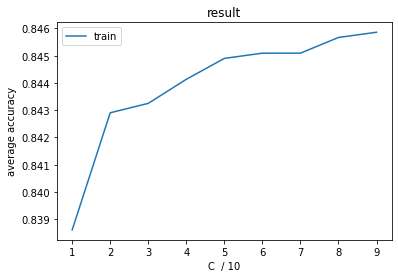

In [9]:
fig, axs = plt.subplots()
axs.set_title("result")
axs.set_ylabel("average accuracy")
axs.set_xlabel("C  / 10")
axs.plot(range(1, 10),train_s,label="train")
axs.legend()

In [10]:
improved_svc = svm.SVC(kernel = "poly", gamma="scale", C=1)

In [11]:
improved_cross_validation_errors = 1.0 - cross_val_score(improved_svc, X_train, y_train,cv=5).mean()
print(f'improved_cross-validation errors: {improved_cross_validation_errors}')

improved_cross-validation errors: 0.15459948435621362


In [12]:
t = improved_svc.fit(X_train, y_train)

In [13]:
improved_training_error = 1-float(t.score(X_train, y_train))
print(f"improved_training_error = {improved_training_error}")

improved_training_error = 0.1317567567567568


In [14]:
improved_test_error = 1.0 - np.mean(improved_svc.predict(X_test) == y_test)
print(f"improved_test_error = {improved_test_error}")

improved_test_error = 0.15078926355874944


# Reference

## https://methods.sagepub.com/dataset/howtoguide/support-vector-machine-in-aci-1996-python